# Fermi 1

Total amount of time-energy for generating a biosphere. 

Calculate the amount of ultraviolet light produced by stars and stellar lifetime as a function of mass.

This is mainly intended as an exploration of the origin of life from non-biological chemistry. After the first self-replicating organisms appear, other factors are more important. 

Larger stars are better for getting life started but don't live long enough for complex forms to evolve. The sun almost as effective but is long lived. Probably near-optimal for the emergence of life.

## Spectral class reference:

https://www.atnf.csiro.au/outreach/education/senior/astrophysics/spectral_class.html

    Class 	Temperature (K)   M/MSun        Main Sequence Lifespan
    O 	    28,000 - 50,000   20 - 60       1 - 10 Myr
    B 	    10,000 - 28,000   3 - 18        11 - 400 Myr
    A 	    7,500 - 10,000    2.0 - 3.0     400 Myr - 3 Gyr
    F 	    6,000 - 7,500     1.1 - 1.6     3 - 7 Gyr
    G 	    4,900 - 6,000     0.65 - 0.85   17 Gyr
    M 	    2,000 - 3,500     0.08 - 0.05   56 Gyr


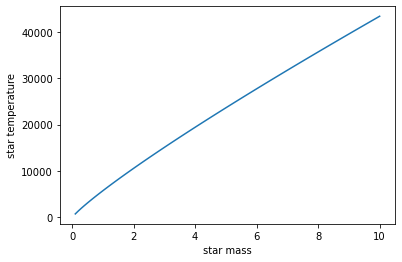

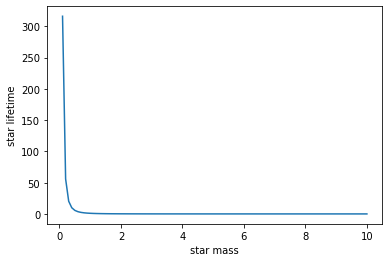

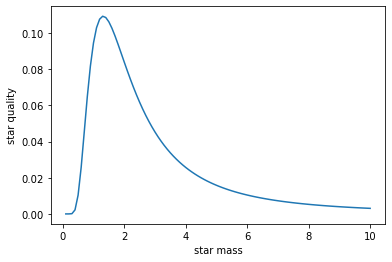

Mass 0.1 Quality 1.4809461397088993e-15 Lifetime 316.2277660168379
Mass 0.2 Quality 3.0679338247667605e-07 Lifetime 55.901699437494734
Mass 0.3 Quality 0.0001347860658543318 Lifetime 20.286020648339488
Mass 0.4 Quality 0.0022457649965056674 Lifetime 9.882117688026185
Mass 0.5 Quality 0.010372065399923752 Lifetime 5.656854249492381
Mass 0.6 Quality 0.02571228109708452 Lifetime 3.586095690932794
Mass 0.7 Quality 0.045263913508090406 Lifetime 2.43924205986611
Mass 0.8 Quality 0.0649310727624944 Lifetime 1.7469281074217105
Mass 0.9 Quality 0.0817990170240409 Lifetime 1.301348831345012
Mass 1.0 Quality 0.0945528487628319 Lifetime 1.0
Mass 1.1 Quality 0.10304359647321294 Lifetime 0.7879856109467703
Mass 1.2 Quality 0.10774930729565797 Lifetime 0.633938145260609
Mass 1.3 Quality 0.10938700208898383 Lifetime 0.5189692421935084
Mass 1.4 Quality 0.10869218348061743 Lifetime 0.4312011503716922
Mass 1.5 Quality 0.10631624686800165 Lifetime 0.36288736930121157
Mass 1.6 Quality 0.10279227433144834 L

In [3]:
from scipy.integrate import quad
from math import exp
import matplotlib.pyplot as plt

# Planck law for thermal emission: #######
# function arguments:
# f is frequency in THz.
# t is temperature in K.

c1 = two_h_over_c_sq = 1.474 * pow(10,-2) # units: kgs, kilogram seconds = nanograms per terrahertz
c2 = h_over_k = 4.799 * pow(10,1) # units: sK, second kelvins

def planck_law(f,t): return c1 * pow(f,3) / (exp(c2*f/t)-1)


# mass, temperature, and luminosity: #######
# all units are solar. 
# m = m/m_solar 
# l = l/l_solar 
# t = t/t_solar 

# lifetime of a star is mass^-2.5
# https://astronomy.swin.edu.au/cosmos/m/main+sequence+lifetime

# luminosity = mass^3.5
# https://en.wikipedia.org/wiki/Mass%E2%80%93luminosity_relation
# = t^4 since radiated power scales this way
# so t = mass^(3.5/4)

# temp of a star as a function of mass:

star_mass = []
star_temp = []

for mass in range(1,101):
    m=float(mass/10.)  # increments of 1/10 solar mass
    star_mass.append(m)
    star_temp.append(5778.0*pow(m,0.875))
    
plt.plot(star_mass,star_temp)
plt.xlabel('star mass')
plt.ylabel('star temperature')
plt.show()  

# the lifetime of a star as a function of mass:
# units of solar lifetime

star_mass = []
star_life = []

for mass in range(1,101):
    m=float(mass/10.)  # increments of 1/10 solar mass
    star_mass.append(m)
    star_life.append(pow(m,-2.5))
    
plt.plot(star_mass,star_life)
plt.xlabel('star mass')
plt.ylabel('star lifetime')
plt.show()  

# put it together

star_quality=[]

for m,t,l in zip(star_mass,star_temp,star_life):
    total=quad(planck_law, 0.1, 10000, args=(t))    # total radiation
    uv=quad(planck_law, 800, 10000, args=(t))  # uv radiation
    star_quality.append(l*uv[0]/total[0])
    
    
plt.plot(star_mass,star_quality)
plt.xlabel('star mass')
plt.ylabel('star quality')
plt.show()  

for m,q,l in zip(star_mass,star_quality,star_life):
    print(f"Mass {m} Quality {q} Lifetime {l}")
    if m>2: break

## Discussion:

The sun is nearly at the peak. 

For smaller stars the quality drops off extremely rapidly. A star just slightly larger that the sun has slightly higher quality, but the lifetime is dropping dramatically.

A star of 0.5 solar masses has a quality only 11% of solar. 

Maximum quality is 116% of solar at 1.3 solar masses— but this star lives half as long. 

This is likely an important factor in the emergence of life.

## Next steps:

My cutoff of 800 THz for UV was arbitrary. Let's find a better number based in chemistry and binding energies of organic molecules.

    1 kJ/mol = 1.0364 E-2 eV/mol ( https://www.reed.edu/chemistry/alan/324/units.html )
             = 0.01036 eV/mol    ( wolfram alpha )

    1 photon = 0.004136 eV/THz

Common binding energies:

https://chem.libretexts.org/Bookshelves/General_Chemistry/Map%3A_General_Chemistry_(Petrucci_et_al.)/10%3A_Chemical_Bonding_I%3A_Basic_Concepts/10.9%3A_Bond_Energies

    H–O 	459 kJ/mol = 4.75524 eV  = 1149.71 THz
    H–C 	411 kJ/mol = 4.25796 eV  = 1029.48 THz
    H–N     386 kJ/mol = 3.99896 eV  =  966.87 THz
    
    C–O 	358 kJ/mol = 3.70888 eV  =  896.73 THz 
    C–C 	346 kJ/mol = 3.58456 eV  =  866.67 THz
    C–N 	305 kJ/mol = 3.15980 eV  =  763.97 THz
    
    N–O 	201 kJ/mol = 2.08236 eV  =  503.47 THz
    N–N    ≈167 kJ/mol = 1.73012 eV  =  418.30 THz

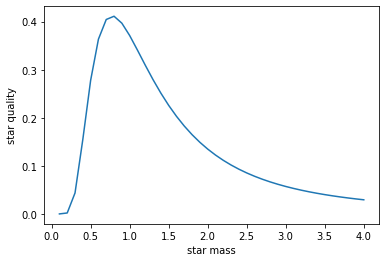

Mass 0.1 Quality 4.0895814212348604e-08 Lifetime 316.2277660168379
Mass 0.2 Quality 0.001959442326645181 Lifetime 55.901699437494734
Mass 0.3 Quality 0.043620519164993266 Lifetime 20.286020648339488
Mass 0.4 Quality 0.15504285578077423 Lifetime 9.882117688026185
Mass 0.5 Quality 0.2778101880988854 Lifetime 5.656854249492381
Mass 0.6 Quality 0.3635255419114827 Lifetime 3.586095690932794
Mass 0.7 Quality 0.4044346557489317 Lifetime 2.43924205986611
Mass 0.8 Quality 0.4111862933673511 Lifetime 1.7469281074217105
Mass 0.9 Quality 0.39674727142863486 Lifetime 1.301348831345012
Mass 1.0 Quality 0.3710873773095833 Lifetime 1.0
Mass 1.1 Quality 0.34068546517783593 Lifetime 0.7879856109467703
Mass 1.2 Quality 0.30936511794549715 Lifetime 0.633938145260609
Mass 1.3 Quality 0.2792054994524758 Lifetime 0.5189692421935084
Mass 1.4 Quality 0.25122199412056867 Lifetime 0.4312011503716922
Mass 1.5 Quality 0.22581304287217935 Lifetime 0.36288736930121157
Mass 1.6 Quality 0.20303573779395032 Lifetime 0.

In [76]:
# Nitrogen, low energy:

# 403 can break N–N and N-O bonds but not the others. 
# nitrogen binds weakly.
# not sure if this reaction is relevant to life
# the peak is just lower than solar mass   

star_quality=[]

for m,t,l in zip(star_mass,star_temp,star_life):
    total=quad(planck_law, 0.1, 10000, args=(t))    # total radiation
    uv=quad(planck_law, 503, 10000, args=(t))  # uv radiation
    star_quality.append(l*uv[0]/total[0])
    
    
plt.plot(star_mass[:40],star_quality[:40])
plt.xlabel('star mass')
plt.ylabel('star quality')
plt.show()  

for m,q,l in zip(star_mass,star_quality,star_life):
    print(f"Mass {m} Quality {q} Lifetime {l}")
    if m>2: break        

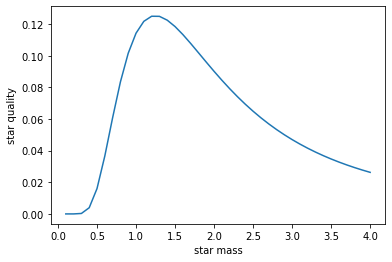

Mass 0.1 Quality 1.2911505488027525e-14 Lifetime 316.2277660168379
Mass 0.2 Quality 9.402811400337482e-07 Lifetime 55.901699437494734
Mass 0.3 Quality 0.00028453152113795227 Lifetime 20.286020648339488
Mass 0.4 Quality 0.003905819856484071 Lifetime 9.882117688026185
Mass 0.5 Quality 0.016012052679885484 Lifetime 5.656854249492381
Mass 0.6 Quality 0.036611909059040514 Lifetime 3.586095690932794
Mass 0.7 Quality 0.060797012010672294 Lifetime 2.43924205986611
Mass 0.8 Quality 0.0834532893316744 Lifetime 1.7469281074217105
Mass 0.9 Quality 0.10158052942310294 Lifetime 1.301348831345012
Mass 1.0 Quality 0.11423470404791809 Lifetime 1.0
Mass 1.1 Quality 0.12173231077943632 Lifetime 0.7879856109467703
Mass 1.2 Quality 0.12494743981270683 Lifetime 0.633938145260609
Mass 1.3 Quality 0.12488166346778637 Lifetime 0.5189692421935084
Mass 1.4 Quality 0.12245387079235008 Lifetime 0.4312011503716922
Mass 1.5 Quality 0.11842279944402685 Lifetime 0.36288736930121157
Mass 1.6 Quality 0.1133771721300123 

In [77]:
# Carbon, medium energy

# 763 can break up C-N -- what we want
# 867 can break up C-C -- what we want

# 897 can break up C-O -- which may be bad as it destroys CO2

# the peak is 
 
star_quality=[]

for m,t,l in zip(star_mass,star_temp,star_life):
    total=quad(planck_law, 0.1, 10000, args=(t))    # total radiation
    uv=quad(planck_law, 763, 10000, args=(t))  # uv radiation
    star_quality.append(l*uv[0]/total[0])
    
    
plt.plot(star_mass[:40],star_quality[:40])
plt.xlabel('star mass')
plt.ylabel('star quality')
plt.show()  

for m,q,l in zip(star_mass,star_quality,star_life):
    print(f"Mass {m} Quality {q} Lifetime {l}")
    if m>2: break

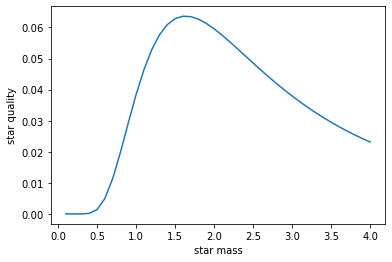

Mass 0.1 Quality 7.863263556453216e-20 Lifetime 316.2277660168379
Mass 0.2 Quality 1.8292649023168676e-09 Lifetime 55.901699437494734
Mass 0.3 Quality 4.334746049846941e-06 Lifetime 20.286020648339488
Mass 0.4 Quality 0.00017355693461347586 Lifetime 9.882117688026185
Mass 0.5 Quality 0.0013758507606800876 Lifetime 5.656854249492381
Mass 0.6 Quality 0.004923061825188728 Lifetime 3.586095690932794
Mass 0.7 Quality 0.011303788038599683 Lifetime 2.43924205986611
Mass 0.8 Quality 0.019826819939153223 Lifetime 1.7469281074217105
Mass 0.9 Quality 0.02923229110598332 Lifetime 1.301348831345012
Mass 1.0 Quality 0.038335287000944115 Lifetime 1.0
Mass 1.1 Quality 0.0463241346747061 Lifetime 0.7879856109467703
Mass 1.2 Quality 0.05278618977713414 Lifetime 0.633938145260609
Mass 1.3 Quality 0.05761485543788257 Lifetime 0.5189692421935084
Mass 1.4 Quality 0.06089651356791527 Lifetime 0.4312011503716922
Mass 1.5 Quality 0.06281823526547743 Lifetime 0.36288736930121157
Mass 1.6 Quality 0.0636048959733

In [75]:
# Hydrogen,  high energy

# 967 can break up H-N in ammonia
# 1150 can break H-O in water molecules
# this might be bad for life
# the peak is higher than solar as expected
 
star_quality=[]

for m,t,l in zip(star_mass,star_temp,star_life):
    total=quad(planck_law, 0.1, 10000, args=(t))    # total radiation
    uv=quad(planck_law, 967, 10000, args=(t))  # uv radiation
    star_quality.append(l*uv[0]/total[0])
    
    
plt.plot(star_mass[:40],star_quality[:40])
plt.xlabel('star mass')
plt.ylabel('star quality')
plt.show()  

for m,q,l in zip(star_mass,star_quality,star_life):
    print(f"Mass {m} Quality {q} Lifetime {l}")
    if m>2: break

## Discussion:

A more reasonable calculation would look at different reactions. Some are good some are bad. Derive a new quality figure from that.

The ideal star would chop up organic molecules but avoid photodissociating too much water and carbon dioxide.

A more ambitious approach would be to look at all reactions that can create amino acids and nucleic acids.

Nucleic acids: https://biologydictionary.net/nucleic-acid-elements-and-monomer/

Amino acids: http://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/formuleAA/

Start with N2 CO2 H2O. Calculate the production of different reactive fragments of these. 